In [ ]:
import torch

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install -q itables

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 21.2 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_path = "/content/drive/MyDrive/Colab Notebooks/Machine_learning_Tahlildadeh"

from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

df = pd.read_csv(f'{data_path}/pr.csv')

df.shape

Mounted at /content/drive


(960, 68)

In [ ]:
df

Unnamed: 0  num_floor  unit_per_floor         price  age  statuse  view  \
0             0          5               2  1.168224e+08    0      3.0     7   
1             1          6               2  1.350000e+08    0      3.0     7   
2             2          4               2  1.589820e+08    0      3.0     7   
3             3          4               1  3.937500e+07   12      1.0     7   
4             4          4               2  6.206897e+07   20      3.0     7   
..          ...        ...             ...           ...  ...      ...   ...   
955         955          4               1  1.030303e+08   17      1.0     7   
956         956          5               1  1.400000e+08    0      3.0     7   
957         957          5               2  9.793814e+07   10      1.0     7   
958         958          4               2  5.428571e+07   12      1.0     7   
959         959          6               2  1.100000e+08    0      3.0     7   

     doc_status  north  sought  ...  z_شهیدعراقی  z_فرجام  z_قنات كوثر  \
0           6.0      0       1  ...        False    False        False   
1           6.0      0       1  ...        False    False        False   
2           6.0      1       0  ...         True    False        False   
3           0.0      0       1  ...        False    False        False   
4           6.0      0       1  ...        False    False        False   
..          ...    ...     ...  ...          ...      ...          ...   
955         6.0      1       0  ...        False    False        False   
956         6.0      0       1  ...        False    False        False   
957         6.0      1       0  ...        False    False        False   
958         6.0      0       1  ...        False    False        False   
959         6.0      0       0  ...        False     True        False   

     z_لویزان  z_مجیدیه  z_میدان شاهد  z_نیروی دریایی  z_هروی  z_هنگام  \
0       False     False         False           False   False    False   
1       False     False         False           False   False    False   
2       False     False         False           False   False    False   
3       False     False         False           False   False    False   
4       False     False         False           False   False    False   
..        ...       ...           ...             ...     ...      ...   
955     False     False         False           False   False    False   
956     False     False         False           False   False    False   
957     False     False         False           False   False    False   
958     False     False         False           False   False    False   
959     False     False         False           False   False    False   

     z_پروین  
0      False  
1      False  
2      False  
3      False  
4      False  
..       ...  
955    False  
956    False  
957    False  
958     True  
959    False  

[960 rows x 68 columns]

In [ ]:
df = df.drop(['Unnamed: 0'], axis=1)
df = df.drop(index = 351, axis='row')
x = df.drop(['price'],axis=1)
y = df['price']
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=1)

In [ ]:
mmy = MinMaxScaler((1,10))
mm_area = MinMaxScaler(feature_range=(1, 7))
mm_age = MinMaxScaler(feature_range=(0, 7))

x_train['area'] = mm_area.fit_transform(x_train['area'].values.reshape(-1,1))
x_train['age'] = mm_age.fit_transform(x_train['age'].values.reshape(-1,1))
x_test['area'] = mm_area.transform(x_test['area'].values.reshape(-1,1))
x_test['age'] = mm_age.transform(x_test['age'].values.reshape(-1,1))

y_mm_train = mmy.fit_transform(y_train.values.reshape(-1,1))
y_mm_test = mmy.transform(y_test.values.reshape(-1,1))

In [ ]:
x_train.shape

(767, 66)

In [ ]:
767//16

47

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
  def __init__(self,data, target):
    self.data = torch.tensor(data.values.astype(float), dtype = torch.float32)
    self.target = torch.tensor(target.astype(float), dtype = torch.float32)

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    return self.data[idx], self.target[idx]


train_dataset = CustomDataset(x_train, y_mm_train)
test_dataset = CustomDataset(x_test, y_mm_test)
train_loader = DataLoader(dataset = train_dataset, batch_size= 16, shuffle= True, num_workers= 3)
test_loader = DataLoader(dataset= test_dataset, batch_size= 16, shuffle= False, num_workers=3)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
from torch import optim
from torch import nn
import torch

class HouseRegression(nn.Module):
  def __init__(self, in_features, hidden_size1 = 200, hidden_size2 = 300, hidden_size3 = 100):
    super().__init__()
    self.fc1 = nn.Linear(in_features,hidden_size1)
    self.fc2 = nn.Linear(hidden_size1,hidden_size2)
    self.fc3 = nn.Linear(hidden_size2,hidden_size3)
    self.fc4 = nn.Linear(hidden_size3,1)
    self.relu = nn.ReLU()

  def forward(self, x):
    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)
    x = self.relu(x)
    x = self.fc3(x)
    x = self.relu(x)
    x = self.fc4(x)
    return x

In [ ]:
import warnings
warnings.filterwarnings('ignore')

Epoch 10/200, Train Loss:  23399818.0155, Validate Loss: 23878968.1132
Epoch 20/200, Train Loss:  20712614.4294, Validate Loss: 20862053.6986
Epoch 30/200, Train Loss:  19834263.9600, Validate Loss: 19992212.3004
Epoch 40/200, Train Loss:  19475184.1038, Validate Loss: 19586355.1088
Epoch 50/200, Train Loss:  19197561.3240, Validate Loss: 19320643.6280
Epoch 60/200, Train Loss:  19021154.3246, Validate Loss: 19271347.4312
Epoch 70/200, Train Loss:  18756010.0146, Validate Loss: 19207089.0613
Epoch 80/200, Train Loss:  18617541.4381, Validate Loss: 19097183.0478
Epoch 90/200, Train Loss:  18381666.2325, Validate Loss: 19063366.5370
Epoch 100/200, Train Loss:  18237090.5180, Validate Loss: 19003432.8956
Epoch 110/200, Train Loss:  18000846.4032, Validate Loss: 19290223.0251
Epoch 120/200, Train Loss:  17861603.2085, Validate Loss: 19304719.0039
Epoch 130/200, Train Loss:  17734487.9175, Validate Loss: 18892666.6128
Epoch 140/200, Train Loss:  17594782.8366, Validate Loss: 18775768.3677
E

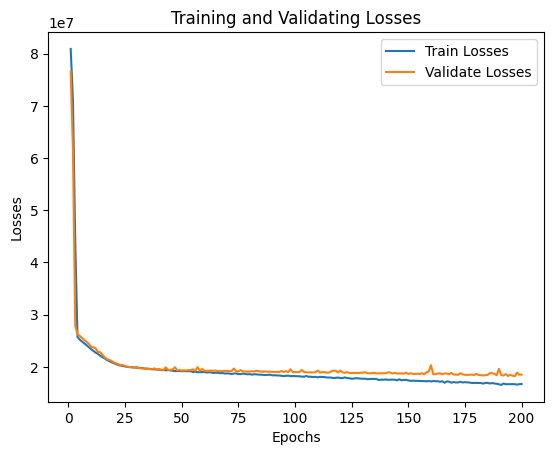

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
in_features = x_train.shape[1]
lr = 1e-3
model = HouseRegression(in_features, 300,300,100).to(device)
optimizer = optim.SGD(model.parameters(),lr = lr)
loss_fn = nn.L1Loss()
n_epochs = 200
train_losses, val_losses = [], []

def train(model, data_loader,loss_fn, optimizer):
    model.train()
    total_loss = 0.0
    for inputs, targets in data_loader:
      inputs, targets = inputs.to(device), targets.to(device)
      outputs = model(inputs)
      loss = loss_fn(outputs, targets)
      total_loss += loss.item()  # tensor adadi ra tabdil be scalar mikonad.
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
    return total_loss/len(data_loader)

def validate(model, data_loader,loss_fn):
    model.eval()
    total_loss = 0.0
    with torch.no_grad():
        for inputs, targets in data_loader:
          inputs, targets = inputs.to(device), targets.to(device)
          outputs = model(inputs)
          loss = loss_fn(outputs, targets)
          total_loss += loss.item()
    return total_loss/len(data_loader)

for epoch in range(1,n_epochs+1):
    train_loss = train(model,train_loader, loss_fn, optimizer)
    val_loss = validate(model, test_loader, loss_fn)
    train_loss = mmy.inverse_transform(np.array(train_loss).reshape(-1,1))
    val_loss = mmy.inverse_transform(np.array(val_loss).reshape(-1,1))
    train_losses.append(train_loss[0][0])
    val_losses.append(val_loss[0][0])
    if epoch % 10 == 0:
      print(f'Epoch {epoch}/{n_epochs}, Train Loss:  {train_loss[0][0]:.4f}, Validate Loss: {val_loss[0][0]:.4f}')

plt.plot(range(1,n_epochs+1),train_losses, label = 'Train Losses' )
plt.plot(range(1,n_epochs+1),val_losses, label = 'Validate Losses' )
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.title('Training and Validating Losses')
plt.legend()
plt.show()

In [ ]:
####################################### Diabetes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_path = "/content/drive/MyDrive/Colab Notebooks/Machine_learning_Tahlildadeh"

from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

df = pd.read_csv(f'{data_path}/diabetes.csv')

df.shape

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(768, 9)

In [ ]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [ ]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
x.shape

(768, 8)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5,stratify=y)

x_temp_test = x_test.copy()

In [ ]:
!pip install -q mlxtend
!pip install -q imbalanced-learn
!pip install -q itables
!pip install -q xgboost

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
import mlxtend
import sklearn
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier

In [ ]:
counter = Counter(y)
print ('Before', counter)

Before Counter({0: 500, 1: 268})


In [ ]:
smt = SMOTE(random_state = 5)

In [ ]:
x_sm , y_sm = smt.fit_resample(x_train,y_train)

In [ ]:
counter = Counter(y_sm)
print('After', counter)

After Counter({1: 400, 0: 400})


In [ ]:
data_path = "/content/drive/MyDrive/Colab Notebooks/Machine_learning_Tahlildadeh"
script_path = "/content/drive/MyDrive/Colab Notebooks/Machine_learning_Tahlildadeh"

import sys
sys.path.append(script_path)

from utils import *

In [ ]:
import xgboost as xgb
from pprint import pprint

# Instantiate the XGBClassifier
xgb_clf = xgb.XGBClassifier(
    colsample_bytree=0.8,
    subsample=0.8,
    learning_rate=0.06,
    max_depth=2,
    n_estimators=20,
    reg_alpha=0.01,
    reg_lambda=0.01,
    random_state=1
)

xgb_clf.fit(x_sm, y_sm)

y_pred_train = xgb_clf.predict(x_sm)
pprint(clf_score(y_sm, y_pred_train, 'Train'))

y_pred_test = xgb_clf.predict(x_test)
pprint(clf_score(y_test, y_pred_test, 'Test'))



**********************************
Scores for Train data
**********************************
{'accuracy_score': 0.82625,
 'f1_score': 0.8311057108140947,
 'precision_score': 0.8085106382978723,
 'recall_score': 0.855}

**********************************
Scores for Test data
**********************************
{'accuracy_score': 0.7532467532467533,
 'f1_score': 0.6885245901639345,
 'precision_score': 0.6176470588235294,
 'recall_score': 0.7777777777777778}


In [ ]:
##################################################

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
  def __init__(self,data, target):
    self.data = torch.tensor(data.values.astype(float), dtype = torch.float32)
    self.target = torch.tensor(target.values.astype(float), dtype = torch.float32)

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    return self.data[idx], self.target[idx]


train_dataset = CustomDataset(x_sm, y_sm)
test_dataset = CustomDataset(x_test, y_test)
train_loader = DataLoader(dataset = train_dataset, batch_size= 16, shuffle= True, num_workers= 3)
test_loader = DataLoader(dataset= test_dataset, batch_size= 16, shuffle= False, num_workers=3)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

Epoch 10/200, Train Loss: 0.5984, Validate Loss: 0.6234
Epoch 20/200, Train Loss: 0.5849, Validate Loss: 0.6286
Epoch 30/200, Train Loss: 0.5800, Validate Loss: 0.6803
Epoch 40/200, Train Loss: 0.5697, Validate Loss: 0.6144
Epoch 50/200, Train Loss: 0.5624, Validate Loss: 0.5755
Epoch 60/200, Train Loss: 0.5544, Validate Loss: 0.5794
Epoch 70/200, Train Loss: 0.5503, Validate Loss: 0.6128
Epoch 80/200, Train Loss: 0.5534, Validate Loss: 0.5780
Epoch 90/200, Train Loss: 0.5368, Validate Loss: 0.6115
Epoch 100/200, Train Loss: 0.5267, Validate Loss: 0.5905
Epoch 110/200, Train Loss: 0.5329, Validate Loss: 0.5572
Epoch 120/200, Train Loss: 0.5262, Validate Loss: 0.5945
Epoch 130/200, Train Loss: 0.5224, Validate Loss: 0.6189
Epoch 140/200, Train Loss: 0.5203, Validate Loss: 0.5958
Epoch 150/200, Train Loss: 0.5155, Validate Loss: 0.5818
Epoch 160/200, Train Loss: 0.5145, Validate Loss: 0.5868
Epoch 170/200, Train Loss: 0.5018, Validate Loss: 0.5736
Epoch 180/200, Train Loss: 0.4952, Valid

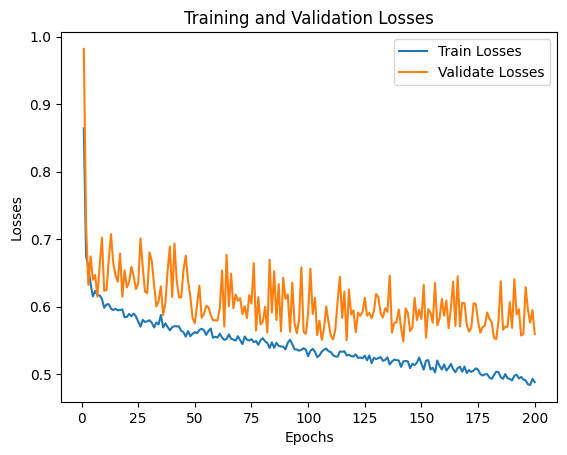

In [ ]:
from torch import optim
from torch import nn
import torch

class DiabetesClassification(nn.Module):
    def __init__(self, in_features, hidden_size1=200, hidden_size2=300, hidden_size3=100):
        super().__init__()
        self.fc1 = nn.Linear(in_features, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.fc4 = nn.Linear(hidden_size3, 2)  # Two output classes
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)  # Output is two logits for the two classes
        return x

in_features = x_sm.shape[1]
lr = 1e-3
model = DiabetesClassification(in_features, 300, 300, 100).to(device)
optimizer = optim.SGD(model.parameters(), lr=lr)
loss_fn = nn.CrossEntropyLoss()
n_epochs = 200
train_losses, val_losses = [], []

def train(model, data_loader, loss_fn, optimizer):
    model.train()
    total_loss = 0.0
    for inputs, targets in data_loader:
        inputs, targets = inputs.to(device), targets.to(device).long()
        outputs = model(inputs)
        loss = loss_fn(outputs, targets)
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    return total_loss / len(data_loader)

def validate(model, data_loader, loss_fn):
    model.eval()
    total_loss = 0.0
    with torch.no_grad():
        for inputs, targets in data_loader:
            inputs, targets = inputs.to(device), targets.to(device).long()  # Ensure targets are LongTensor
            outputs = model(inputs)
            loss = loss_fn(outputs, targets)
            total_loss += loss.item()
    return total_loss / len(data_loader)

# Training loop
for epoch in range(1, n_epochs + 1):
    train_loss = train(model, train_loader, loss_fn, optimizer)
    val_loss = validate(model, test_loader, loss_fn)
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    if epoch % 10 == 0:
        print(f'Epoch {epoch}/{n_epochs}, Train Loss: {train_loss:.4f}, Validate Loss: {val_loss:.4f}')

# Plotting
plt.plot(range(1, n_epochs + 1), train_losses, label='Train Losses')
plt.plot(range(1, n_epochs + 1), val_losses, label='Validate Losses')
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def calculate_metrics(model, data_loader):
    model.eval()
    all_outputs = []
    all_targets = []

    with torch.no_grad():
        for inputs, targets in data_loader:
            inputs, targets = inputs.to(device), targets.to(device).long()
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)

            all_outputs.append(predicted.cpu().numpy())
            all_targets.append(targets.cpu().numpy())

    all_outputs = np.concatenate(all_outputs)
    all_targets = np.concatenate(all_targets)

    accuracy = accuracy_score(all_targets, all_outputs)
    precision = precision_score(all_targets, all_outputs)
    recall = recall_score(all_targets, all_outputs)
    f1 = f1_score(all_targets, all_outputs)

    return accuracy, precision, recall, f1

train_accuracy, train_precision, train_recall, train_f1 = calculate_metrics(model, train_loader)
val_accuracy, val_precision, val_recall, val_f1 = calculate_metrics(model, test_loader)

print(f'Train Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1: {train_f1:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1: {val_f1:.4f}')


Train Accuracy: 0.7825, Precision: 0.7269, Recall: 0.9050, F1: 0.8062
Validation Accuracy: 0.6753, Precision: 0.5244, Recall: 0.7963, F1: 0.6324
